<a href="https://colab.research.google.com/github/ViniitMe/Machine-Learning-foundation-and-Applications/blob/master/Speech_signal_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import glob
import imutils
import librosa
import librosa.display
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import skimage.color as color
import skimage.segmentation as seg
import matplotlib.pyplot as plt
from google.colab import drive

In [0]:
# Mounting google drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Loading & reading audio files

In [0]:
# Loading & reading audio files
#duration=10
aud_file = []
rates = []
for file in glob.glob("/content/drive/My Drive/15MI33017/total/*.wav"):
  (sig, rate) = librosa.load(file)
  aud_file.append(sig)
  rates.append(rate)

variable rate contains the sampling rate of sig, that is, the number of samples per second of audio

In [0]:
print(len(aud_file))
print(aud_file[0].shape)
print(aud_file[1].shape)
# Shape of all datafiles are different however the rate is same i.e. 22050

80
(59130,)
(44313,)


# Plotting Audio Signals with default rate 

Amplitude envelope of the waveform

Text(0, 0.5, 'Amplitude')

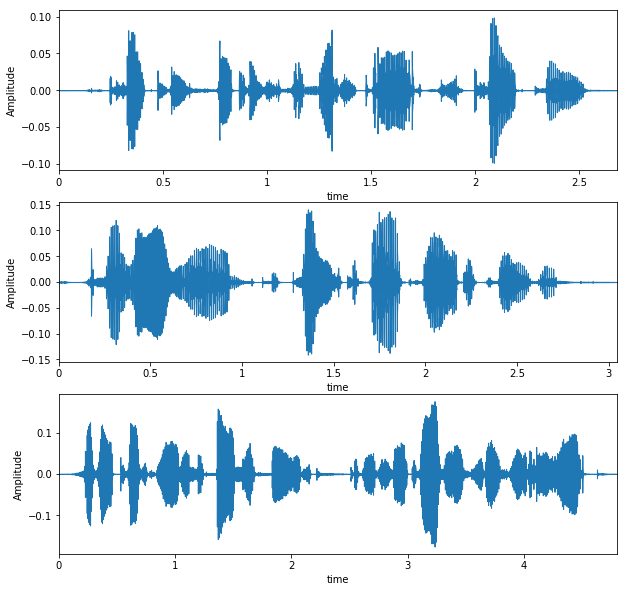

In [0]:
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
librosa.display.waveplot(aud_file[0], sr=22050)
plt.xlabel('time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
librosa.display.waveplot(aud_file[5], sr=22050)
plt.xlabel('time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
librosa.display.waveplot(aud_file[29], sr=22050)
plt.xlabel('time')
plt.ylabel('Amplitude')


Spectrogram

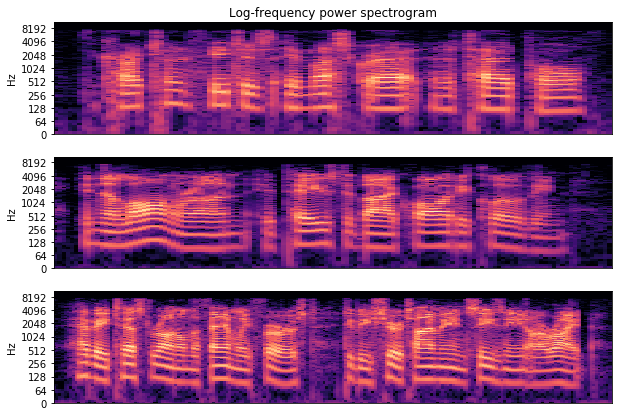

In [0]:
plt.figure(figsize=(10,7))
plt.subplot(3, 1, 1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(aud_file[0])), ref=np.max)
librosa.display.specshow(D, y_axis='log')
plt.title('Log-frequency power spectrogram')

plt.subplot(3, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(aud_file[5])), ref=np.max)
librosa.display.specshow(D, y_axis='log')

plt.subplot(3, 1, 3)
D = librosa.amplitude_to_db(np.abs(librosa.stft(aud_file[29])), ref=np.max)
librosa.display.specshow(D, y_axis='log')

# Plotting Audio Signals with sampling rate 16000

Text(0, 0.5, 'Amplitude')

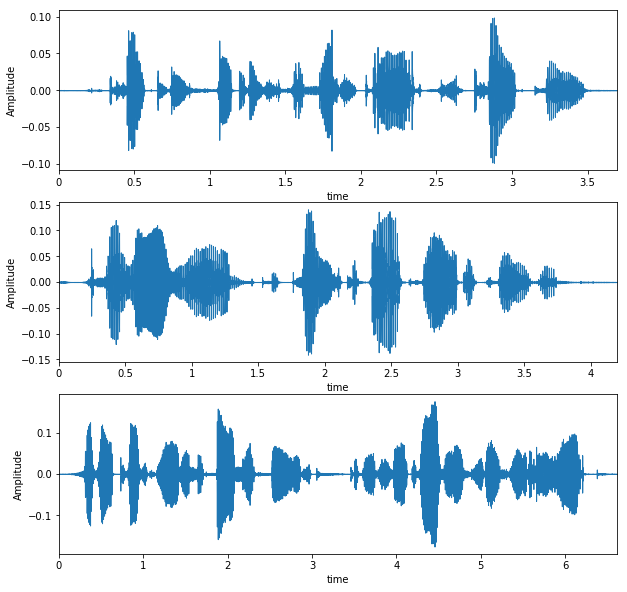

In [0]:
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
librosa.display.waveplot(aud_file[0], sr=16000)
plt.xlabel('time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
librosa.display.waveplot(aud_file[5], sr=16000)
plt.xlabel('time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
librosa.display.waveplot(aud_file[29], sr=16000)
plt.xlabel('time')
plt.ylabel('Amplitude')

# Feature Generation

In [0]:
#https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

l = []
sr = []
labels = []
for audiopath in glob.glob('/content/drive/My Drive/15MI33017/total/*.wav'):
  data, sampling_rate = librosa.load(audiopath, duration = 1.42)
  l.append(data)
  sr.append(sampling_rate)
  labels.append(int(audiopath[40:-4]))

file_ = []

for i in range(len(lis)):
  data = librosa.resample(l[i], sr[i], 16000)
  file_.append(data)
Data = np.array(file_)

In [0]:
Features_vector = []
sr = 16000
for i in range(len(Data)):
  chroma_stft = librosa.feature.chroma_stft(y=Data[i], sr=sr)
  spec_cent = librosa.feature.spectral_centroid(y=Data[i], sr=sr)
  spec_bw = librosa.feature.spectral_bandwidth(y=Data[i], sr=sr)
  rolloff = librosa.feature.spectral_rolloff(y=Data[i], sr=sr)
  zcr = librosa.feature.zero_crossing_rate(Data[i])
  mfcc = librosa.feature.mfcc(y=Data[i], sr=sr)
  F = []
  F.append(np.mean(chroma_stft))
  F.append(np.mean(spec_cent))
  F.append(np.mean(spec_bw))
  F.append(np.mean(rolloff))
  F.append(np.mean(zcr))
  F.append(np.mean(mfcc))
  
  Features_vector.append(F)

Features = np.array(Features_vector)
normalized_features = normalize(Features, axis = 0)
df = pd.DataFrame(normalized_features)

Feature Vector

In [0]:
df.head(15)

,0,1,2,3,4,5
0,0.140208,0.112652,0.117562,0.116863,0.114533,-0.102296
1,0.106364,0.128218,0.117625,0.123579,0.138805,-0.111623
2,0.105663,0.100546,0.109040,0.099652,0.104960,-0.102996
3,0.104328,0.093503,0.101685,0.099078,0.070998,-0.106789
4,0.112097,0.117904,0.118840,0.120714,0.125609,-0.120891
5,0.127800,0.100741,0.101626,0.102893,0.097496,-0.106408
6,0.122373,0.134707,0.127701,0.136289,0.149145,-0.116832
7,0.118960,0.111292,0.104875,0.115304,0.103822,-0.103024
8,0.128078,0.107379,0.104111,0.099942,0.117365,-0.101942
9,0.114448,0.090685,0.105969,0.095705,0.087886,-0.106135


# GMM

In [0]:
from sklearn.mixture import GaussianMixture
GMM10 = GaussianMixture(n_components = 10)
GMM5 = GaussianMixture(n_components = 5)
GMM2 = GaussianMixture(n_components = 2)
ans10 = GMM10.fit_predict(normalized_features)
ans5 = GMM5.fit_predict(normalized_features)
ans2 = GMM2.fit_predict(normalized_features)

For 10 Clusters

In [0]:
pred = []
for i in range(0,10):
    temp = []
    for j in range(80):
        if i == ans10[j]:
            temp.append(labels[j])
    pred.append(temp)

In [0]:
for i in range(10):
  print("cluster No: ", i, pred[i])

cluster No:  0 [42, 25]
cluster No:  1 [31, 51, 69, 49, 17, 29, 27]
cluster No:  2 [11, 71, 37, 61, 15, 79, 35, 9, 5]
cluster No:  3 [33, 56, 20, 26, 10, 24, 3, 70, 13, 4, 2, 30]
cluster No:  4 [12, 39, 80, 32, 21, 58, 78, 43]
cluster No:  5 [50, 23, 6, 40, 76, 45, 72, 62, 14, 44]
cluster No:  6 [41, 1, 73, 63, 22, 67, 38, 19, 65, 75]
cluster No:  7 [57, 7, 47, 77, 59]
cluster No:  8 [16, 28, 68, 48, 74, 60, 53, 18, 54, 36]
cluster No:  9 [66, 34, 52, 64, 55, 46, 8]


For 5 Clusters

In [0]:
pred = []
for i in range(0,10):
    temp = []
    for j in range(80):
        if i == ans5[j]:
            temp.append(labels[j])
    pred.append(temp)

for i in range(5):
  print("cluster No: ", i, pred[i])

cluster No:  0 [71]
cluster No:  1 [33, 1, 66, 56, 20, 26, 10, 24, 73, 74, 3, 70, 6, 34, 52, 22, 13, 4, 64, 32, 72, 38, 55, 46, 8, 25, 2, 30, 36]
cluster No:  2 [16, 28, 12, 39, 68, 48, 80, 60, 53, 18, 27, 54, 21, 58, 78, 43]
cluster No:  3 [31, 51, 69, 57, 49, 7, 67, 47, 17, 29, 19, 77, 59]
cluster No:  4 [42, 41, 11, 50, 23, 37, 40, 76, 63, 61, 45, 15, 62, 79, 35, 9, 14, 65, 44, 5, 75]


For 2 Clusters

In [0]:
pred = []
for i in range(0,10):
    temp = []
    for j in range(80):
        if i == ans2[j]:
            temp.append(labels[j])
    pred.append(temp)

for i in range(2):
  print("cluster No: ", i, pred[i])

cluster No:  0 [33, 16, 1, 66, 56, 20, 28, 26, 12, 10, 39, 68, 24, 73, 48, 74, 31, 80, 51, 69, 57, 3, 70, 6, 34, 52, 49, 60, 22, 13, 7, 4, 64, 67, 32, 53, 18, 72, 38, 55, 46, 47, 17, 29, 27, 8, 54, 21, 19, 58, 2, 30, 77, 36, 78, 43, 59]
cluster No:  1 [42, 41, 11, 71, 50, 23, 37, 40, 76, 63, 61, 45, 15, 62, 25, 79, 35, 9, 14, 65, 44, 5, 75]
